## Utils

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.constants import au, R_sun, R_jup


### Load DataFrames

In [2]:
data_train_full = pd.read_csv('data_train_full.csv')
data_test_without_label = pd.read_csv('data_test_without_label.csv')
data_test_full = pd.read_csv('data_test_full.csv')


In [3]:
# check size
print("n examples train + validation: ", data_train_full[data_train_full["view"] == "Global"].shape[0])
print("n examples test (without label): ", data_test_without_label[data_test_without_label["view"] == "Global"].shape[0])
print("n examples test: ", data_test_full[data_test_full["view"] == "Global"].shape[0])

n examples train + validation:  3350
n examples test (without label):  373
n examples test:  373


### Get example function and visualization

In [4]:
def get_example(index, folder, data, get_info = True, only_info = False):
    
    query_index = data[data["index"] == index]
    local_filename = query_index[query_index["view"] == "Local"]["filename"].values[0]
    global_filename = query_index[query_index["view"] == "Global"]["filename"].values[0]
    
    info = {}
    if (get_info):
        info = {
            'target': data[data["index"] == index]['target'].values[0],
            'satellite': data[data["index"] == index]['satellite'].values[0],
            'label': data[data["index"] == index]['label'].values[0],
            'r_s': query_index["star_radius"].values[0],
            'r_p': query_index["k"].values[0] * query_index["star_radius"].values[0] * R_sun /R_jup ,
            'k': query_index["k"].values[0],
            'p': query_index["period"].values[0],
            'a_os': query_index["aos"].values[0],
            'i': query_index["i"].values[0],
            't_0': query_index["t0"].values[0]
        }

        if (only_info):
            return info

    data_global = np.load(f"{folder}/{global_filename}")
    data_local = np.load(f"{folder}/{local_filename}")

    return data_local, data_global, info

def plot_views(index, folder, data, title_local = '', title_global = ''):
    
    data_local, data_global, info = get_example(index, folder, data)
    print(info)
    
    
    textstr = '\n'.join((
        r'$r_{s}=%.2f$' % (info['r_s'], ),
        r'$r_{p}=%.2f$' % (info['r_p'], ),
        r'$k=%.2f$' % (info['k'], ),
        r'$p=%.6f$' % (info['p'], ),
        r'$a_{os}=%.2f$' % (info['a_os'], ),
        r'$i=%.4f$' % (info['i'], ),
        r'$t_{0}=%.3f$' % (info['t_0'], )
    ))
    
    title_local += f"{info['target']}({info['satellite']}). {info['label']}"
    title_global += f"{info['target']}({info['satellite']}). {info['label']}"

    fig = plt.figure(figsize=(12, 4)) 
    ax = fig.add_subplot(1, 2, 1)
    plt.title(title_local, fontsize = 15)
    plt.xlabel("Bin", fontsize = 13)
    plt.ylabel("Normalized Brightness", fontsize = 13)
    plt.ylim(-1.1, 0.5)
    plt.plot(data_local[0, :], data_local[1,:], 'b.')
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

    ax.text(0.02, 0.5, textstr, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', bbox=props)

    ax = fig.add_subplot(1, 2, 2)
    plt.title(title_global, fontsize = 15)
    plt.xlabel("Bin", fontsize = 13)
    plt.ylabel("Normalized Brightness", fontsize = 13)
    plt.ylim(-1.1, 0.5)
    plt.plot(data_global[0, :], data_global[1,:], 'b.')

    plt.show()

### Example

{'target': 'HD105211', 'satellite': 'UBr', 'label': 'PC', 'r_s': 1.78292, 'r_p': <Quantity 1.74149122>, 'k': 0.1003748421593922, 'p': 2.508672475009443, 'a_os': 10.274398679358034, 'i': 1.5489221753885791, 't_0': 1480.667838786993}


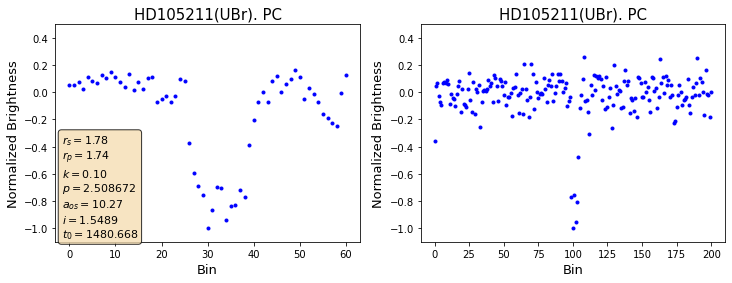

In [5]:
folder = "GeneratedSamples"

idx = 76 # modify for a specific index 

plot_views(idx, folder, data_train_full)
    

{'target': 'HD88661', 'satellite': 'BHr', 'label': 'NOT_PC', 'r_s': 2.59, 'r_p': <Quantity 1.2239034>, 'k': 0.0485604631845356, 'p': 4.266122279827947, 'a_os': 10.040939498883787, 'i': 1.5453404755427247, 't_0': 3402.183901722265}


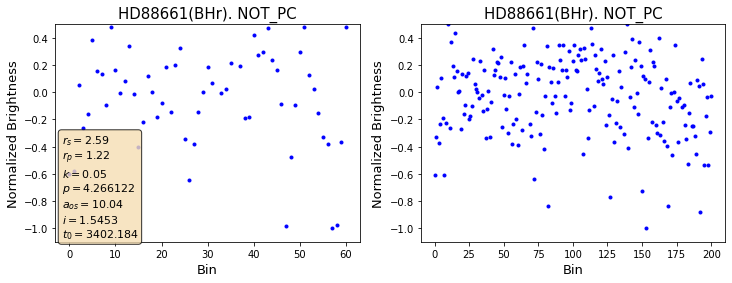

In [6]:
folder = "GeneratedSamples"

idx = 11417 # modify for a specific index 

plot_views(idx, folder, data_train_full)
    